In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/SAP_stock_data (3).csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-09-18,13.250,13.250,13.250,13.250,9.462356,1200
1,1995-09-19,13.375,13.375,13.375,13.375,9.551620,12000
2,1995-09-20,13.625,13.625,13.625,13.625,9.730159,7600
3,1995-09-21,13.750,13.750,13.750,13.750,9.819424,43200
4,1995-09-22,12.875,12.875,12.875,12.875,9.194551,49600


In [2]:
print("Null values before transformation:")
print(df.isnull().sum())

Null values before transformation:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [3]:
df['MA_7'] = df['Close'].rolling(window=7).mean()

In [4]:
df['Daily_Return'] = df['Close'].pct_change() * 100

In [5]:
df['Weekday'] = df['Date'].dt.day_name()

In [6]:
print("\nNull values after transformation:")
print(df.isnull().sum())


Null values after transformation:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA_7            6
Daily_Return    1
Weekday         0
dtype: int64


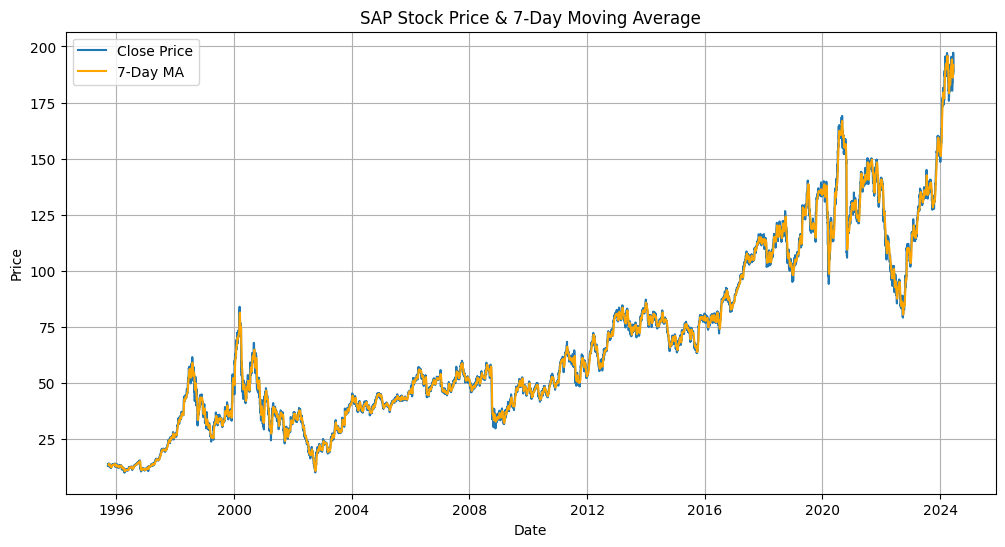

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA_7'], label='7-Day MA', color='orange')
plt.title('SAP Stock Price & 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

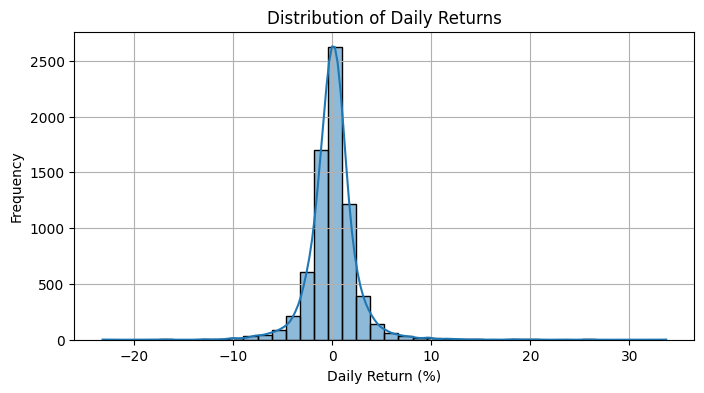

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Daily_Return'].dropna(), bins=40, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
weekday_avg = df.groupby('Weekday')['Close'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
])

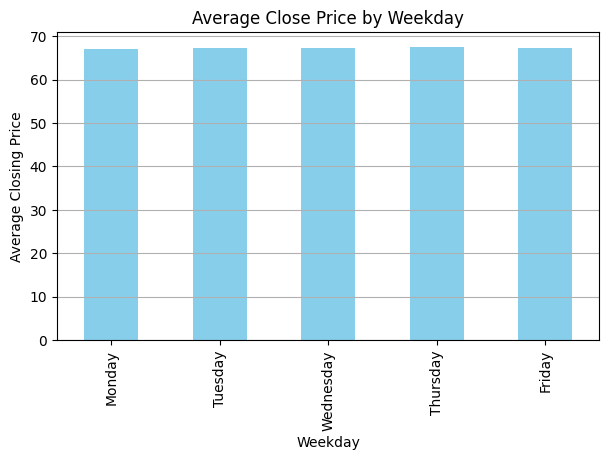

In [10]:
plt.figure(figsize=(7, 4))
weekday_avg.plot(kind='bar', color='skyblue')
plt.title('Average Close Price by Weekday')
plt.ylabel('Average Closing Price')
plt.grid(axis='y')
plt.show()

In [11]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume,MA_7,Daily_Return,Weekday
0,1995-09-18,13.250,13.250,13.250,13.250,9.462356,1200,NaN,NaN,Monday
1,1995-09-19,13.375,13.375,13.375,13.375,9.551620,12000,NaN,0.943396,Tuesday
2,1995-09-20,13.625,13.625,13.625,13.625,9.730159,7600,NaN,1.869159,Wednesday
3,1995-09-21,13.750,13.750,13.750,13.750,9.819424,43200,NaN,0.917431,Thursday
4,1995-09-22,12.875,12.875,12.875,12.875,9.194551,49600,NaN,-6.363636,Friday
5,1995-09-25,13.500,13.500,13.500,13.500,9.640887,7200,NaN,4.854369,Monday


In [12]:
df.dropna(inplace=True)

# Check again
print("Null values after dropping:")
print(df.isnull().sum())

Null values after dropping:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA_7            0
Daily_Return    0
Weekday         0
dtype: int64


In [13]:
# Drop rows with any null values
df.dropna(inplace=True)

# Check again
print("Null values after dropping:")
print(df.isnull().sum())

Null values after dropping:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA_7            0
Daily_Return    0
Weekday         0
dtype: int64


In [14]:
# Fill missing values using forward-fill method
df.fillna(method='ffill', inplace=True)

# Check again
print("Null values after forward-fill:")
print(df.isnull().sum())

Null values after forward-fill:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA_7            0
Daily_Return    0
Weekday         0
dtype: int64


<ipython-input-14-177b4aee4d63>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [15]:
df.to_csv("Cleaned_SAP_stock_data.csv", index=False)

In [16]:
# Drop rows with any null values
df.dropna(inplace=True)

# Confirm nulls are removed
print("Null values after dropping:")
print(df.isnull().sum())

Null values after dropping:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA_7            0
Daily_Return    0
Weekday         0
dtype: int64


In [17]:
df=pd.read_csv("/content/SAP_stock_data (3).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-09-18,13.250,13.250,13.250,13.250,9.462356,1200
1,1995-09-19,13.375,13.375,13.375,13.375,9.551620,12000
2,1995-09-20,13.625,13.625,13.625,13.625,9.730159,7600
3,1995-09-21,13.750,13.750,13.750,13.750,9.819424,43200
4,1995-09-22,12.875,12.875,12.875,12.875,9.194551,49600


In [18]:
df=pd.read_csv("/content/SAP_stock_data (3).csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-09-18,13.250000,13.250000,13.250000,13.250000,9.462356,1200
1,1995-09-19,13.375000,13.375000,13.375000,13.375000,9.551620,12000
2,1995-09-20,13.625000,13.625000,13.625000,13.625000,9.730159,7600
3,1995-09-21,13.750000,13.750000,13.750000,13.750000,9.819424,43200
4,1995-09-22,12.875000,12.875000,12.875000,12.875000,9.194551,49600
...,...,...,...,...,...,...,...
7231,2024-06-10,188.830002,190.520004,188.759995,190.240005,190.240005,456300
7232,2024-06-11,187.190002,189.550003,186.399994,188.740005,188.740005,1006300
7233,2024-06-12,195.169998,197.429993,194.899994,197.199997,197.199997,1325100
7234,2024-06-13,195.100006,195.520004,190.330002,192.419998,192.419998,909600


In [19]:
# 1. Show number of null values in each column
print(df.isnull().sum())

# 2. Check if any null value exists in the entire DataFrame
print("Any null values in DataFrame?", df.isnull().values.any())

# 3. Get total number of null values in the DataFrame
print("Total number of null values:", df.isnull().sum().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Any null values in DataFrame? False
Total number of null values: 0


In [20]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7236 entries, 0 to 7235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7236 non-null   object 
 1   Open       7236 non-null   float64
 2   High       7236 non-null   float64
 3   Low        7236 non-null   float64
 4   Close      7236 non-null   float64
 5   Adj Close  7236 non-null   float64
 6   Volume     7236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 395.8+ KB
None
              Open         High          Low        Close    Adj Close  \
count  7236.000000  7236.000000  7236.000000  7236.000000  7236.000000   
mean     67.261031    67.810951    66.696410    67.288008    57.551873   
std      39.711381    39.896387    39.526849    39.719320    40.012500   
min       9.930000     9.937500     9.930000     9.937500     7.096766   
25%      38.599998    39.040001    38.189374    38.610001    28.299217   
50%      53.825001   

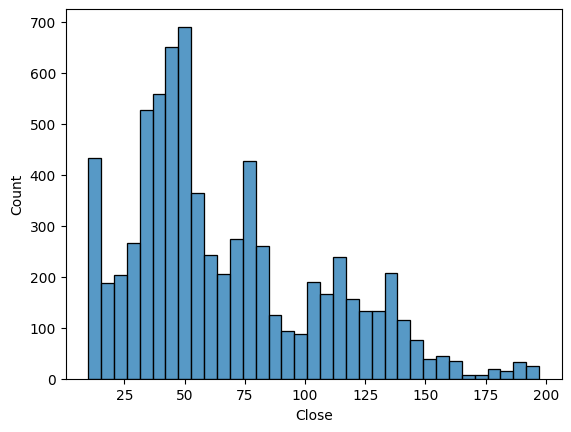

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Check distribution of 'Close' values
sns.histplot(df['Close'])
plt.show()